# 0.) Import and Clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("Country-data.csv")
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
data = pd.read_csv("Country-data.csv", sep = ",")
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
names = data[["country"]].copy()
X = data.drop(["country"], axis = 1)

In [5]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [6]:
kmeans = KMeans(n_clusters = 5).fit(X_scaled)
kmeans

/Users/salinla/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

# 2.) Pick two features to visualize across

In [7]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

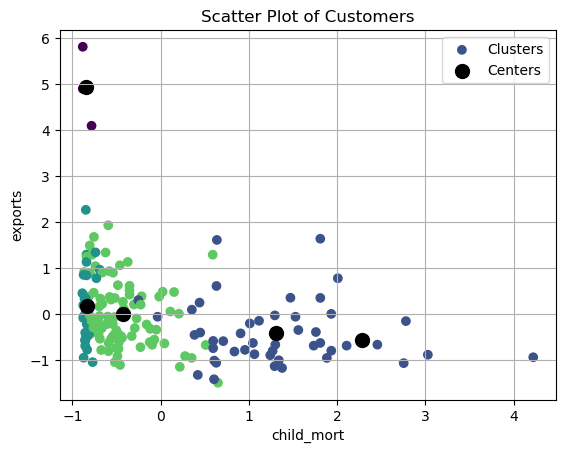

In [8]:
x1_index = 0 
x2_index = 1 


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')


plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [9]:
WCSSs = []
ks = range(1, 15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = 'random') 
    kmeans.fit(X_scaled)
    WCSSs.append(kmeans.inertia_)
WCSSs

[1503.0,
 1050.2145582853304,
 831.4244352086874,
 700.3229986404374,
 634.6679834052982,
 561.9528329648244,
 509.6051061677015,
 475.78993867391404,
 424.2671093565632,
 394.49836264995093,
 372.9208767060419,
 355.8939708577086,
 336.8859270975434,
 318.982485438401]

In [10]:
WCSSs = [KMeans(n_clusters = k, n_init = 30, init = 'random').fit(X_scaled).inertia_ for k in range(1, 15)]
WCSSs

[1503.0,
 1050.2145582853304,
 831.4244352086874,
 700.3229986404374,
 632.3942572883416,
 564.0370835205321,
 511.541088530055,
 464.39945255572354,
 424.19503630875056,
 396.27502269222504,
 375.3503619729004,
 355.04581913905974,
 343.5388823972464,
 332.7413986937155]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

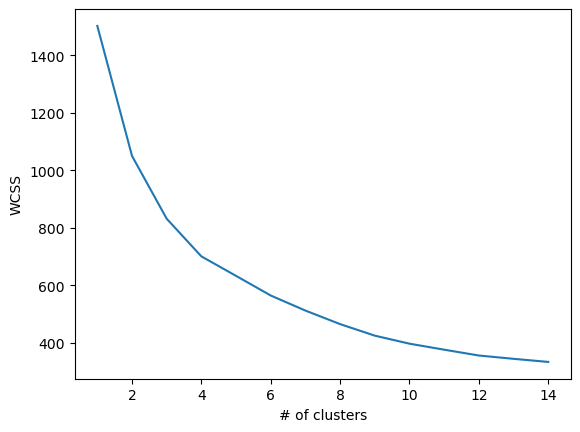

In [11]:
plt.plot(ks, WCSSs)
plt.xlabel("# of clusters")
plt.ylabel("WCSS")
plt.show()

> The choice of two clusters for the K-means shows countries based on their economic growth and health indicators, specifically using export levels and child mortality rates. The countries are grouped into two categories: Developed (high exports and low child mortality) and Developing (lower exports and higher child mortality).

# 6.) Do the same for a silhoutte plot

In [12]:
SCs = []
ks = range(2, 15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = 'random') 
    kmeans.fit(X_scaled)
    SCs.append(silhouette_score(X_scaled, kmeans.labels_))

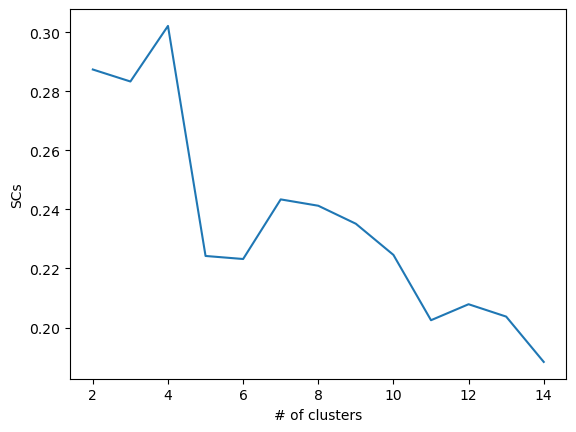

In [13]:
plt.plot(ks, SCs)
plt.xlabel("# of clusters")
plt.ylabel("SCs")
plt.show()

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [14]:
kmeans = KMeans(n_clusters = 2, n_init = 30, init = 'random').fit(X_scaled)

In [15]:
preds = pd.DataFrame(kmeans.predict(X_scaled))
output = pd.concat([preds, data], axis = 1)
output

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,0,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,0,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,1,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,1,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,0,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [16]:
print("Claster 1: ")
list(output.loc[output[0] == 1, "country"])

Claster 1: 


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

In [17]:
print("Claster 2: ")
list(output.loc[output[0] == 0, "country"])

Claster 2: 


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

>- `Cluster 2` countries show higher child mortality and lower income levels, indicating urgent health and economic challenges.
>- `Cluster 1` countries, show signs of stronger economies and better health outcomes, with higher GDP per capita and lower child mortality rates.

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [22]:
numeric_cols = output.select_dtypes(include=[np.number])
cluster_means = numeric_cols.groupby(output.iloc[:, 0]).mean()
cluster_means

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,,
0,0.0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,1.0,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


In [24]:
numeric_cols = output.select_dtypes(include=[np.number])
cluster_std = numeric_cols.groupby(output.iloc[:, 0]).std()
cluster_std

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,,
0,0.0,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189
1,0.0,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127


# 9.) Write an observation about the descriptive statistics.

>- `Child Mortality` : Developing countries have a much higher average child mortality rate compared to Developed countries, indicating substantial healthcare challenges.
>- `GDP per Capita`: Developed countries significantly outpace Developing countries in avg income and GDP per capita.
>- `Exports & Imports`: Developed countries may have more diversified and high-value exports and imports.
>- `Health`: Developed countries tends to invest more in health as a percentage of GDP.
>- `Income`: it is significantly higher in Developed countries, showing economic prosperity.
>- `Inflation`: Inflation rates are notably higher in Developing countries, suggesting economic instability.
>- `Life Expectancy` : Developed countries have higher life expectancy and lower fertility rates, indicating to better health outcomes.
>- `GDP per Capita` Markedly higher in Developed countries.